In [1]:
import numpy as np # Importo algebra Lineal
import matplotlib.pyplot as plt # Importo librería de gráficos 
import copy


In [6]:
# Defino el mallado y los parametros

# MDF_COMMENT
Nx=10
Ny=10

cdc=[1,1,1,0] # Con 1 condicion de temperatura, con 0 condicion de flujo
              #primer indice arriba, segun indice izq, tercer indice der, cuarto indice abajo

TAR=100 #Arriba
TAB=0  #Abajo
TI=75 #Izquierda
TD=50 #Derecha



In [7]:

beta=Nx/Ny
M=np.eye(Nx*Ny,Nx*Ny)
b=np.zeros(Nx*Ny)
        
        
# Hago la matriz

for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        k=i+j*Nx
        M[k,k+1]=1
        M[k,k-1]=1
        M[k,k]=-2*(1+beta**2)
        M[k,k-Nx]=beta**2
        M[k,k+Nx]=beta**2
    

# Hago el vector de carga y las condiciones de contorno

n=len(cdc)

# Creo el vector esquinas, representa las esquinas

esquinas = np.zeros(4)
esquinas[0] = 0 #extremo inf izquierdo
esquinas[1] = Nx-1 #extremo inf izquierdo
esquinas[2] = (Ny-1)*Nx #extremo sup izquierdo
esquinas[3] = (Nx-1) + (Ny-1)*Nx #extremo super derecho



# No solo tengo que modificar el vector de carga b, si no que tambien tengo que modificar la matriz
# En ese punto k 


for a in range(0,n): #Segun este en alguna linea hay pongo las condiciones de contorno
    
    if a==0: #Estoy en la linea de arriba
        up=np.arange(esquinas[2],esquinas[3]+1,1)
        lenup=len(up)
        
        for i in range(0,lenup):
            
            if cdc[a]==1: #cdc de temperatura
                aux=up[i].astype(int) 
                b[aux] = TAR 

            elif cdc[a]==0: #cdc de flujo de calor, #Tengo que modificar el vector de carga y la matriz M
                aux=up[i].astype(int) 
                
                # Modifico la matriz, mas bien la lleno donde corresponde, antes habia un 1 o ceros
                
                M[k,k]=-2*(1+beta**2)
                M[k,k+1]=2
                M[k,k+Nx]=beta**2
                M[k,k-Nx]=beta**2
                
                b[k]=0
                
               
                
    elif a==1: #Estoy en la linea de la IZQ
        
        izq=np.arange(esquinas[0],esquinas[2]+1,Nx)
        lenizq=len(izq)
        
        for i in range(0,lenizq):
            
            if cdc[a]==1: #cdc de temperatura
                aux=izq[i].astype(int)
                b[aux] = TI 

            elif cdc[a]==0: #cdc de flujo de calor #Tengo que modificar el vector de carga y la matriz M
                aux=izq[i].astype(int) 
                
                # Modifico la matriz, mas bien la lleno donde corresponde, antes habia un 1 o ceros
                
                M[k,k]=-2*(1+beta**2)
                M[k,k+1]=2
                M[k,k+Nx]=beta**2
                M[k,k-Nx]=beta**2
                
                b[k]=0
                
       
        
    elif a==2: #Estoy en la linea de la DER
        
        der=np.arange(esquinas[1],esquinas[3]+1,Nx)
        lender=len(der)
        
        for i in range(0,lender):
            
            if cdc[a]==1: #cdc de temperatura
                aux=der[i].astype(int)
                b[aux] = TD

            elif cdc[a]==0: #cdc de flujo de calor #Tengo que modificar el vector de carga y la matriz M
                aux=der[i].astype(int) 
                
                # Modifico la matriz, mas bien la lleno donde corresponde, antes habia un 1 o ceros
                
                M[k,k]=-2*(1+beta**2)
                M[k,k+1]=2
                M[k,k+Nx]=beta**2
                M[k,k-Nx]=beta**2
                
                b[k]=0
                
       
        
    elif a==3: #Estoy en la linea de linea de abajo
        
        down=np.arange(esquinas[0],esquinas[1]+1,1)
        lendown=len(down)
        
        for i in range(0,lendown):
            
            if cdc[a]==1: #cdc de temperatura
                aux=down[i].astype(int)
                b[aux] = TAB

            elif cdc[a]==0: #cdc de flujo de calor #Tengo que modificar el vector de carga y la matriz M
                aux=down[i].astype(int) 
                
                # Modifico la matriz, mas bien la lleno donde corresponde, antes habia un 1 o ceros
                
                M[k,k]=-2*(1+beta**2)
                M[k,k+1]=2
                M[k,k+Nx]=beta**2
                M[k,k-Nx]=beta**2
                
                b[k]=0
                
            
            
# Hago los extremos de los bordes con las temperaturas promedio

b[0]=(TI+TAB)/2 #Extremo inf izq
b[Nx-1]=(TD+TAB)/2 #Extremo inf der
b[-(Nx)]=(TI+TAR)/2#Extremo sup izq
b[-1]=(TD+TAR)/2 #Extremo sup der
                



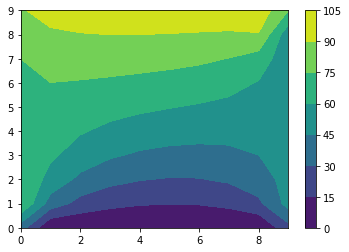

In [8]:
# Resolvemos el sistema y hacemos matriz de temperaturas

Temp=np.linalg.solve(M,b)
Matriztemp =np.zeros([Nx,Ny])

for i in range(0,Nx):
    for j in range(0,Ny):
        k=i+j*Nx
        Matriztemp[j,i]=Temp[k]

        
        
#Hago una grilla de Nx-1 por Ny-1

x = np.linspace(0,Nx-1,Nx).astype(int) #astype para definir numeros enteros
y = np.linspace(0,Ny-1,Ny).astype(int)
X,Y = np.meshgrid(x,y)

#Grafico de temperaturas

plt.contourf(X,Y,Matriztemp)
plt.colorbar()

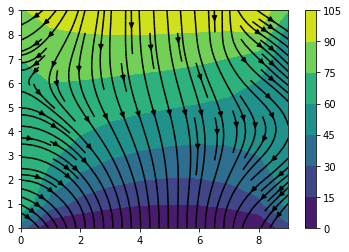

In [9]:
# Vamos a ver la parte del flujo
# Defino los diferenciales y las matrices de flujos

dx = 1/(Nx+1)
dy = 1/(Ny+1)
Flujox = np.zeros([Nx,Ny]) 
Flujoy = np.zeros([Nx,Ny])

#Hago una grilla de Nx-1 por Ny-1

x = np.linspace(0,Nx-1,Nx).astype(int) #astype para definir numeros enteros
y = np.linspace(0,Ny-1,Ny).astype(int)
X,Y = np.meshgrid(x,y)

# Calcular la direccion de los flujos con cada punto de la matriz de temperaturas, el flujo es proporcional a dT/dx o dT/dy

for i in range (Nx-1):
    for j in range (Ny-1):
        
        k = i + j * Nx

        #El tema es que queda mejor el calculo si usamos la derivada media, agarrando un punto atras y otro adelante, en las 
        #esquinas esto no se puede hacer, entonces hacemos derivada total, en los lados la derivada media se puede hacer 
        #según sea el eje x o y, todo se contempla en los if siguientes. 
        
        if k == esquinas[0]:
            Flujoy[j,i] = (Matriztemp[j+1,i]-Matriztemp[j,i])/(dx)
            Flujox[j,i] = (Matriztemp[j,i+1]-Matriztemp[j,i])/(dy)
        elif k == esquinas[1]:
            Flujoy[j,i] = (Matriztemp[j+1,i]-Matriztemp[j,i])/(dx)
            Flujox[j,i] = (Matriztemp[j,i]-Matriztemp[j,i-1])/(dx)
        elif k == esquinas[2]:
            Flujoy[j,i] = (Matriztemp[j,i]-Matriztemp[j-1,i])/(dx)
            Flujox[j,i] = (Matriztemp[j,i]-Matriztemp[j,i-1])/(dx)
        elif k == esquinas[3]:
            Flujoy[j,i] = (Matriztemp[j,i]-Matriztemp[j-1,i])/(dx)
            Flujox[j,i] = (Matriztemp[j,i+1]-Matriztemp[j,i])/(dx)         
        elif i == 0 : #linea vertical izquierda
            Flujoy [j,i] = (Matriztemp[j+1,i]-Matriztemp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriztemp[j,i+1]-Matriztemp[j,i])/(dx)
        elif i == Nx-1 :   #linea vertical derecha   
            Flujoy [j,i] = (Matriztemp[j+1,i]-Matriztemp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriztemp[j,i]-Matriztemp[j,i-1])/(dx)
        elif j == 0:  #linea horizontal abajo 
            Flujoy[j,i] = (Matriztemp[j+1,i]-Matriztemp[j,i])/(dx)
            Flujox [j,i] = (Matriztemp[j,i+1]-Matriztemp[j,i-1])/(2*dy)
        elif j == Ny-1:     #linea horizontal arriba     
            Flujoy[j,i] = (Matriztemp[j+1,i]-Matriztemp[j,i])/(dx)
            Flujox [j,i] = (Matriztemp[j,i+1]-Matriztemp[j,i-1])/(2*dy)
        else: #Todos los puntos intermedios
            Flujoy [j,i] = (Matriztemp[j+1,i]-Matriztemp[j-1,i])/(2*dx)
            Flujox [j,i] = (Matriztemp[j,i+1]-Matriztemp[j,i-1])/(2*dy)


#Grafico la distribucion de temperaturas con sus respectivos flujos

plt.contourf(X,Y,Matriztemp)
plt.colorbar()        
plt.streamplot(X,Y,-Flujox,-Flujoy,color='k')

